<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

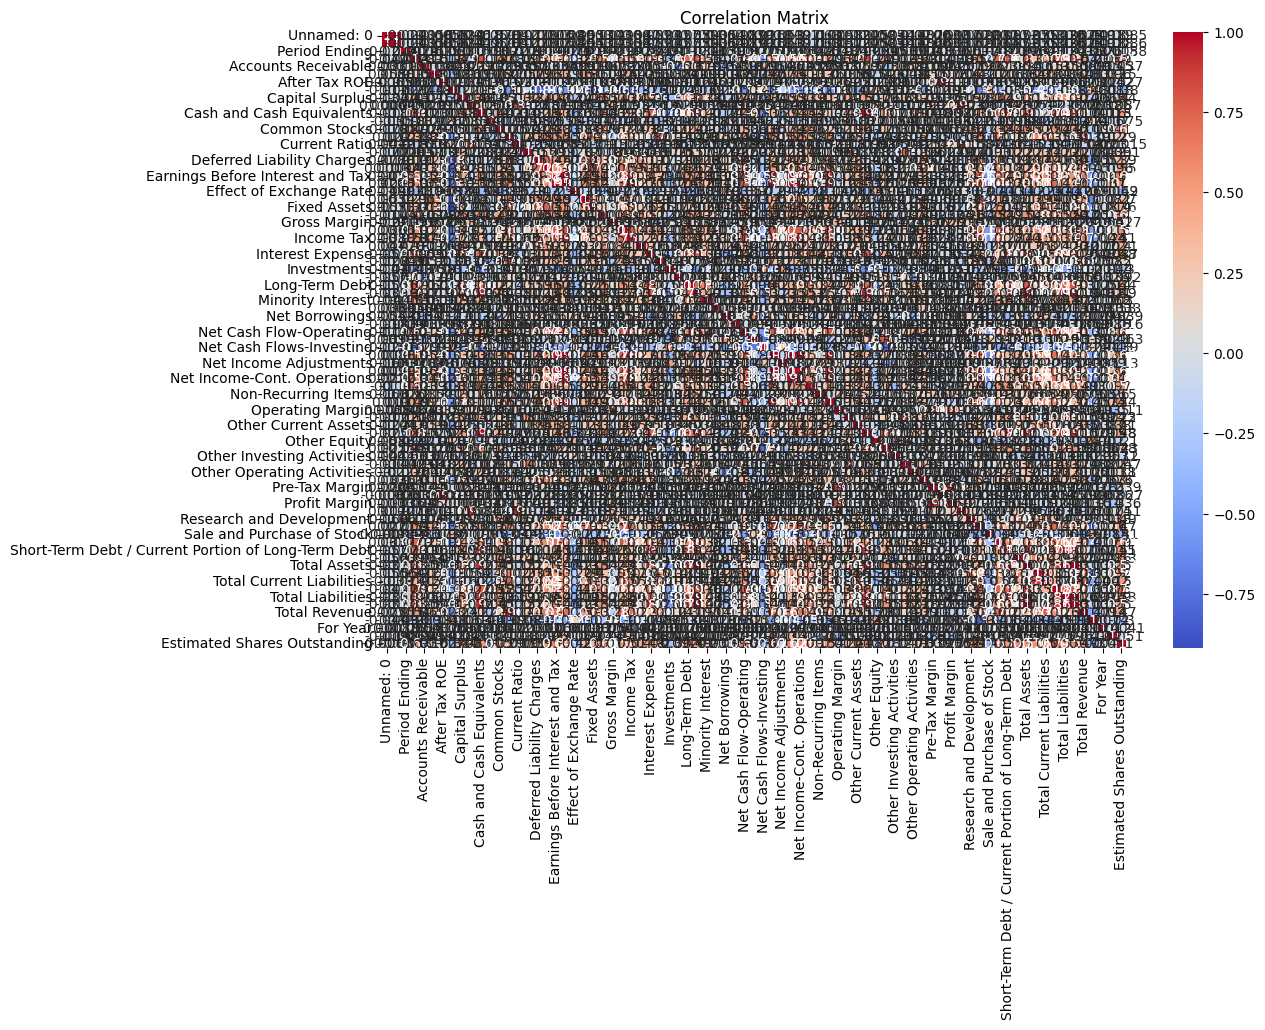

/tmp/ipykernel_7179/1915080899.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

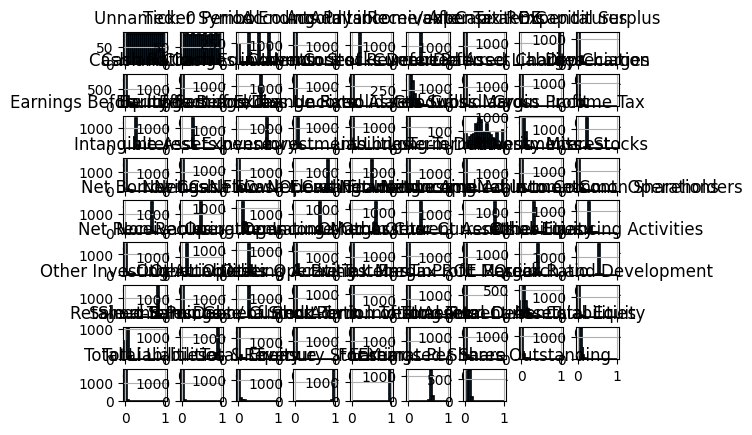

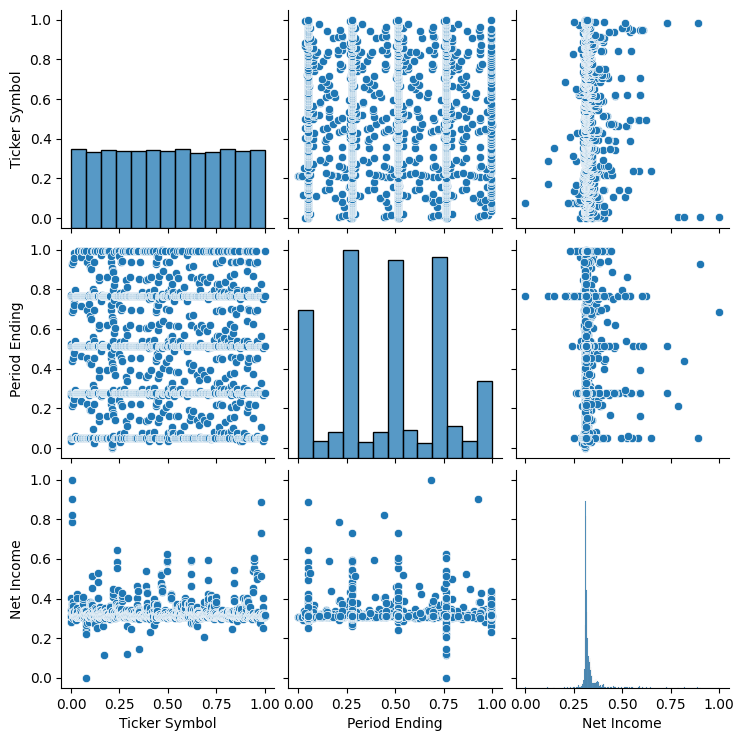

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
dataset_path = "~/Documents/datasets/fundamentals.csv"
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(df.info())
# Handle non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Convert non-numeric columns using LabelEncoder
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    df[column] = label_encoder.fit_transform(df[column])
# Normalize numerical columns using Min-Max Scaling
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())
# Summary statistics
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Visualize data distribution
plt.figure(figsize=(15, 8))
df.hist(bins=20, edgecolor='black', linewidth=1.2)
plt.tight_layout()
plt.show()
target = 'Net Income'
# Pairplot for selected features
sns.pairplot(df[['Ticker Symbol', 'Period Ending', 'Net Income']])
plt.show()

In [2]:
from numpy import vstack
from numpy import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from tqdm import tqdm
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, random_split
from sklearn.model_selection import GridSearchCV
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import Sigmoid
from torch.nn import Module
# Define your neural network architecture
# Define your neural network architecture
class RegressionModel(nn.Module):
    def __init__(self, n_inputs , hidden_size):
        super(RegressionModel, self).__init__()
        self.hidden1 = nn.Linear(n_inputs, hidden_size)
        self.act1 = nn.Sigmoid()
        self.hidden2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.hidden1(x)
        x = self.act1(x)
        x = self.hidden2(x)
        return x

In [4]:
class PyTorchWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model, criterion, optimizer, batch_size, epochs, lr=0.001):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr

    def fit(self, X, y):
        train_data = TensorDataset(X, y)
        train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=True)

        optimizer = self.optimizer
        if not isinstance(optimizer, torch.optim.Optimizer):
            optimizer = optimizer(self.model.parameters(), lr=self.lr)

        self.model.train()
        total_loss = 0.0  # New variable to accumulate the total loss

        for epoch in range(self.epochs):
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()  # Accumulate the loss value

        average_loss = total_loss / len(train_loader.dataset)
        return average_loss  # Return the average loss

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            return self.model(X).numpy()
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
    

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.optim import SGD

target_column = 'Net Income'  # Replace with the actual target variable name

# Extract features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Optionally, handle missing values in X and y
# Example: Impute missing values with the mean
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Display the first few rows of X and y
print("X:")
print(X.head())

print("\ny:")
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.Tensor(y_train.values)
X_test_tensor = torch.Tensor(X_test.values)
y_test_tensor = torch.Tensor(y_test.values)
# Instantiate the PyTorch model
model = RegressionModel(n_inputs=78, hidden_size=20)

# Define hyperparameters for GridSearchCV
param_grid = {
    'model__lr': [0.001, 0.01, 0.1],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64],
}

# Define loss function and instantiate the PyTorchWrapper
criterion = nn.MSELoss()
wrapper = PyTorchWrapper(model, criterion, None, None, None)

# Use GridSearchCV
grid_search = GridSearchCV(wrapper, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train_tensor, y_train_tensor)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


X:
   Unnamed: 0  Ticker Symbol  Period Ending  Accounts Payable  \
0    0.000000       0.000000       0.049689          0.014826   
1    0.000562       0.000000       0.279503          0.024041   
2    0.001124       0.000000       0.515528          0.022557   
3    0.001685       0.000000       0.763975          0.024655   
4    0.002247       0.002237       0.037267          0.011643   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0             0.213972                    0.229670       0.003973   
1             0.218402                    0.193263       0.011574   
2             0.216101                    0.316197       0.024702   
3             0.233686                    0.289537       0.023320   
4             0.218523                    0.323392       0.005528   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0              0.950171         0.049688    0.050913  ...   
1              0.917899         0.103785    0.072046  ...   
2       

/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  retur

Best Hyperparameters: {'batch_size': 64, 'epochs': 10, 'model__lr': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>}


Epoch 1/10 => Train Loss: 0.0030 | Test Loss: 0.0018
Epoch 1/10 => Train R^2: 0.1638 | Test R^2: 0.1657


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 2/10 => Train Loss: 0.0005 | Test Loss: 0.0021
Epoch 2/10 => Train R^2: 0.0645 | Test R^2: 0.0328


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 3/10 => Train Loss: 0.0005 | Test Loss: 0.0022
Epoch 3/10 => Train R^2: 0.0482 | Test R^2: 0.0005


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 4/10 => Train Loss: 0.0005 | Test Loss: 0.0022
Epoch 4/10 => Train R^2: 0.0433 | Test R^2: -0.0090


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 5/10 => Train Loss: 0.0005 | Test Loss: 0.0022
Epoch 5/10 => Train R^2: 0.0412 | Test R^2: -0.0139


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 6/10 => Train Loss: 0.0005 | Test Loss: 0.0022
Epoch 6/10 => Train R^2: 0.0495 | Test R^2: -0.0098


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 7/10 => Train Loss: 0.0005 | Test Loss: 0.0022
Epoch 7/10 => Train R^2: 0.0311 | Test R^2: -0.0185


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 8/10 => Train Loss: 0.0005 | Test Loss: 0.0022
Epoch 8/10 => Train R^2: 0.0430 | Test R^2: -0.0154


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 9/10 => Train Loss: 0.0005 | Test Loss: 0.0022
Epoch 9/10 => Train R^2: 0.0394 | Test R^2: -0.0125


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/10 => Train Loss: 0.0005 | Test Loss: 0.0022
Epoch 10/10 => Train R^2: 0.0451 | Test R^2: -0.0095


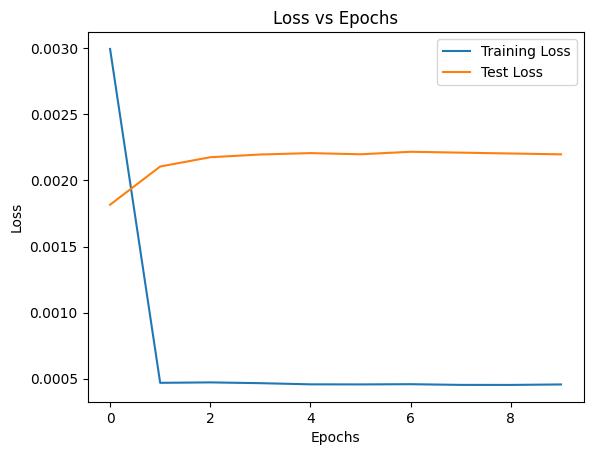

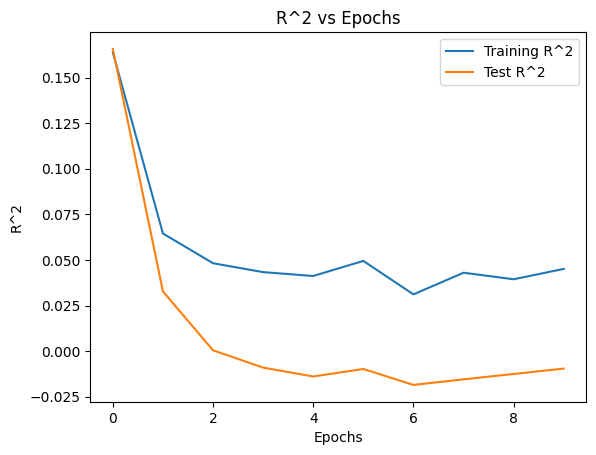

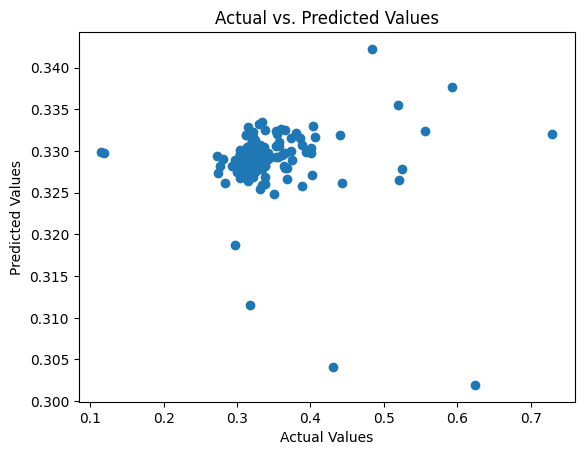

In [8]:
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Set random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Training parameters
best_lr = best_params['model__lr']
best_optimizer = best_params['optimizer']
best_epochs = best_params['epochs']
best_batch_size = best_params['batch_size']

# Instantiate the PyTorch model
model = RegressionModel(n_inputs=78, hidden_size=20)

# Define optimizer
optimizer = best_optimizer(model.parameters(), lr=best_lr)

# Define loss function
criterion = nn.MSELoss()

# Instantiate the PyTorchWrapper
wrapper = PyTorchWrapper(model, criterion, optimizer, best_batch_size, best_epochs)

# Lists to store loss and accuracy values during training
train_losses = []
test_losses = []

#list the accuracy metrics 
train_r2_values = []
test_r2_values = []

# Train the model
for epoch in range(best_epochs):
    # Train
    train_loss = wrapper.fit(X_train_tensor, y_train_tensor)
    train_pred = wrapper.predict(X_train_tensor)  # Add this line to get predictions
    train_losses.append(train_loss)
    train_r2 = r2_score(y_train_tensor, train_pred)
    train_r2_values.append(train_r2)

    # Test
    y_pred_test = wrapper.predict(X_test_tensor)
    test_loss = mean_squared_error(y_test_tensor, y_pred_test)
    test_losses.append(test_loss)
    test_r2 = r2_score(y_test_tensor, y_pred_test)
    test_r2_values.append(test_r2)

    print(f"Epoch {epoch + 1}/{best_epochs} => Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"Epoch {epoch + 1}/{best_epochs} => Train R^2: {train_r2:.4f} | Test R^2: {test_r2:.4f}")
# Plot Loss vs Epochs
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

# Plot R-squared vs Epochs
plt.plot(train_r2_values, label='Training R^2')
plt.plot(test_r2_values, label='Test R^2')
plt.xlabel('Epochs')
plt.ylabel('R^2')
plt.legend()
plt.title('R^2 vs Epochs')
plt.show()

plt.scatter(y_test_tensor, y_pred_test)  # Fix the variable name to y_pred_test
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [9]:
class DropoutRegressionModel(nn.Module):
    def __init__(self, n_inputs, hidden_size, dropout_rate):
        super(DropoutRegressionModel, self).__init__()
        self.hidden1 = nn.Linear(n_inputs, hidden_size)
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.act1 = nn.Sigmoid()
        self.hidden2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.hidden2(x)
        return x


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/30 => Train Loss: 0.0238 | Test Loss: 0.0074
Epoch 1/30 => Train R^2: -2.1022 | Test R^2: -2.4110


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 2/30 => Train Loss: 0.0094 | Test Loss: 0.0054
Epoch 2/30 => Train R^2: -1.3424 | Test R^2: -1.4788


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 3/30 => Train Loss: 0.0060 | Test Loss: 0.0046
Epoch 3/30 => Train R^2: -1.0176 | Test R^2: -1.0980


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 4/30 => Train Loss: 0.0043 | Test Loss: 0.0041
Epoch 4/30 => Train R^2: -0.8061 | Test R^2: -0.8685


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 5/30 => Train Loss: 0.0033 | Test Loss: 0.0038
Epoch 5/30 => Train R^2: -0.6698 | Test R^2: -0.7243


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 6/30 => Train Loss: 0.0027 | Test Loss: 0.0035
Epoch 6/30 => Train R^2: -0.5707 | Test R^2: -0.6184


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 7/30 => Train Loss: 0.0023 | Test Loss: 0.0033
Epoch 7/30 => Train R^2: -0.4882 | Test R^2: -0.5300


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 8/30 => Train Loss: 0.0021 | Test Loss: 0.0031
Epoch 8/30 => Train R^2: -0.4184 | Test R^2: -0.4454


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 9/30 => Train Loss: 0.0019 | Test Loss: 0.0030
Epoch 9/30 => Train R^2: -0.3567 | Test R^2: -0.3767


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/30 => Train Loss: 0.0017 | Test Loss: 0.0029
Epoch 10/30 => Train R^2: -0.3039 | Test R^2: -0.3168


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 11/30 => Train Loss: 0.0017 | Test Loss: 0.0028
Epoch 11/30 => Train R^2: -0.2588 | Test R^2: -0.2688


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 12/30 => Train Loss: 0.0016 | Test Loss: 0.0027
Epoch 12/30 => Train R^2: -0.2250 | Test R^2: -0.2364


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 13/30 => Train Loss: 0.0015 | Test Loss: 0.0026
Epoch 13/30 => Train R^2: -0.2015 | Test R^2: -0.2121


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 14/30 => Train Loss: 0.0015 | Test Loss: 0.0026
Epoch 14/30 => Train R^2: -0.1854 | Test R^2: -0.1944


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 15/30 => Train Loss: 0.0015 | Test Loss: 0.0026
Epoch 15/30 => Train R^2: -0.1735 | Test R^2: -0.1792


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 16/30 => Train Loss: 0.0015 | Test Loss: 0.0025
Epoch 16/30 => Train R^2: -0.1644 | Test R^2: -0.1678


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 17/30 => Train Loss: 0.0014 | Test Loss: 0.0025
Epoch 17/30 => Train R^2: -0.1571 | Test R^2: -0.1594


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 18/30 => Train Loss: 0.0014 | Test Loss: 0.0025
Epoch 18/30 => Train R^2: -0.1510 | Test R^2: -0.1530


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 19/30 => Train Loss: 0.0014 | Test Loss: 0.0025
Epoch 19/30 => Train R^2: -0.1459 | Test R^2: -0.1469


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 20/30 => Train Loss: 0.0014 | Test Loss: 0.0025
Epoch 20/30 => Train R^2: -0.1416 | Test R^2: -0.1415


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 21/30 => Train Loss: 0.0014 | Test Loss: 0.0025
Epoch 21/30 => Train R^2: -0.1380 | Test R^2: -0.1368


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 22/30 => Train Loss: 0.0014 | Test Loss: 0.0025
Epoch 22/30 => Train R^2: -0.1344 | Test R^2: -0.1333


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 23/30 => Train Loss: 0.0014 | Test Loss: 0.0025
Epoch 23/30 => Train R^2: -0.1311 | Test R^2: -0.1291


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 24/30 => Train Loss: 0.0014 | Test Loss: 0.0025
Epoch 24/30 => Train R^2: -0.1281 | Test R^2: -0.1260


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 25/30 => Train Loss: 0.0014 | Test Loss: 0.0024
Epoch 25/30 => Train R^2: -0.1252 | Test R^2: -0.1232


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 26/30 => Train Loss: 0.0014 | Test Loss: 0.0024
Epoch 26/30 => Train R^2: -0.1226 | Test R^2: -0.1205


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 27/30 => Train Loss: 0.0014 | Test Loss: 0.0024
Epoch 27/30 => Train R^2: -0.1201 | Test R^2: -0.1178


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 28/30 => Train Loss: 0.0014 | Test Loss: 0.0024
Epoch 28/30 => Train R^2: -0.1178 | Test R^2: -0.1158


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 29/30 => Train Loss: 0.0014 | Test Loss: 0.0024
Epoch 29/30 => Train R^2: -0.1156 | Test R^2: -0.1133


/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/dell/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 30/30 => Train Loss: 0.0014 | Test Loss: 0.0024
Epoch 30/30 => Train R^2: -0.1135 | Test R^2: -0.1115


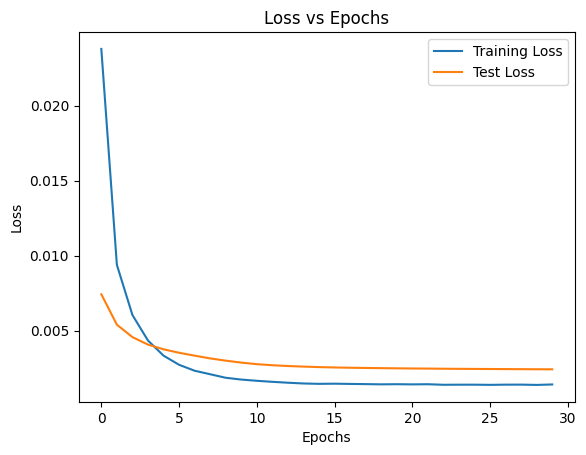

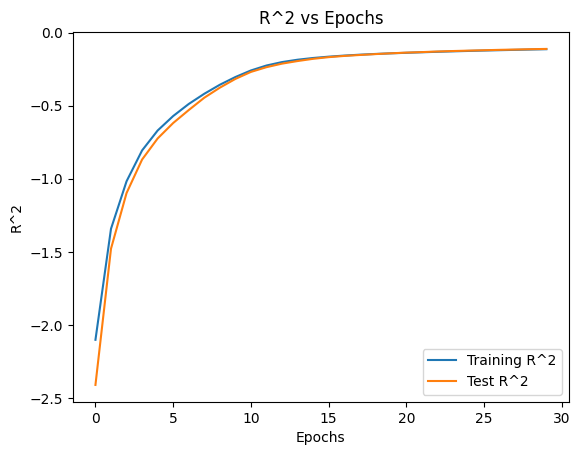

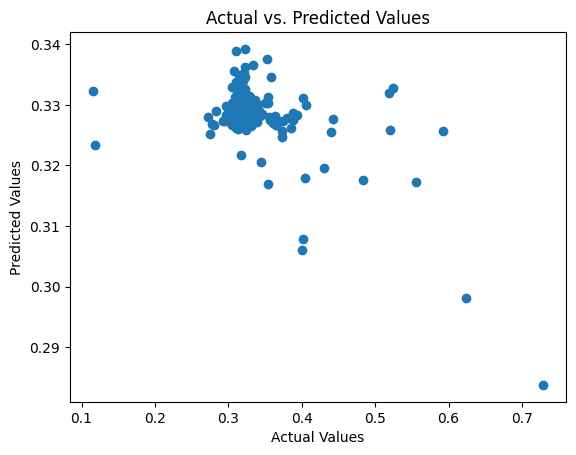

In [10]:
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import torch.nn.functional as F

# Set random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Training parameters
best_lr = best_params['model__lr']
best_optimizer = best_params['optimizer']
best_epochs = 30  # Adjust the number of epochs as needed
best_batch_size = best_params['batch_size']

# Instantiate the PyTorch model
model = DropoutRegressionModel(n_inputs=78, hidden_size=15, dropout_rate=0.5)  # Adjust dropout_rate as needed

# Define optimizer
optimizer = SGD(model.parameters(), lr=best_lr)

# Define loss function
criterion = nn.MSELoss()

# Instantiate the PyTorchWrapper
wrapper = PyTorchWrapper(model, criterion, optimizer, best_batch_size, best_epochs)

# Lists to store loss and accuracy values during training
train_losses = []
test_losses = []

# List the accuracy metrics
train_r2_values = []
test_r2_values = []

# Train the model
for epoch in range(best_epochs):
    # Train
    model.train()  # Set the model to training mode
    train_loss = wrapper.fit(X_train_tensor, y_train_tensor)
    train_pred = wrapper.predict(X_train_tensor)
    train_losses.append(train_loss)
    train_r2 = r2_score(y_train_tensor, train_pred)
    train_r2_values.append(train_r2)

    # Test
    model.eval()  # Set the model to evaluation mode
    y_pred_test = wrapper.predict(X_test_tensor)
    test_loss = mean_squared_error(y_test_tensor, y_pred_test)
    test_losses.append(test_loss)
    test_r2 = r2_score(y_test_tensor, y_pred_test)
    test_r2_values.append(test_r2)

    print(f"Epoch {epoch + 1}/{best_epochs} => Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"Epoch {epoch + 1}/{best_epochs} => Train R^2: {train_r2:.4f} | Test R^2: {test_r2:.4f}")

# Plot Loss vs Epochs
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

# Plot R-squared vs Epochs
plt.plot(train_r2_values, label='Training R^2')
plt.plot(test_r2_values, label='Test R^2')
plt.xlabel('Epochs')
plt.ylabel('R^2')
plt.legend()
plt.title('R^2 vs Epochs')
plt.show()

# Optionally, you can visualize the predicted vs. actual values
plt.scatter(y_test_tensor, y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
